# GRADIENT DESCENT



In [47]:
# The following imports are assumed for the rest of the problems
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import copy
from matplotlib.animation import FuncAnimation

In [75]:
def gradient_descent(gradient, start,end ,start_coeffecient=2 ,learn_rate=0.01, n_iter=2500, tolerance=1e-09):
    # Initialize the vector
    vector = start

    # Initialize the value
    value = [(start[i] + end[i])/start_coeffecient for i in range(len(start))]

    # Check if the vector is within the bounds
    if  np.any(vector>end) or np.any(vector<start):
        print ("start_coeffecient value excideng range setting to 2")
        value = [(start[i] + end[i])/2 for i in range(len(start))]
    
    vector=value 

    # Initialize the list to store the intermediate vectors
    l=[]

    # Iterate over the number of iterations
    for _ in range(n_iter):

        # Compute the gradient
        diff = -learn_rate * gradient(*vector)

        # Check if the gradient is within the tolerance or if the vector is out of bounds
        if (np.all(np.abs(diff) <= tolerance) or np.any(vector>end) or np.any(vector<start)) :
            break

        # Update the vector
        vector += diff

        # Make a deep copy of the vector and append it to the list
        deep_copied_variable = copy.deepcopy(vector)
        l.append (deep_copied_variable )
    return vector,l

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

[-1.49999995]
[[-0.03      ]
 [-0.0594    ]
 [-0.088212  ]
 [-0.11644776]
 [-0.1441188 ]
 [-0.17123643]
 [-0.1978117 ]
 [-0.22385547]
 [-0.24937836]
 [-0.27439079]
 [-0.29890297]
 [-0.32292491]
 [-0.34646642]
 [-0.36953709]
 [-0.39214635]
 [-0.41430342]
 [-0.43601735]
 [-0.457297  ]
 [-0.47815106]
 [-0.49858804]
 [-0.51861628]
 [-0.53824396]
 [-0.55747908]
 [-0.5763295 ]
 [-0.59480291]
 [-0.61290685]
 [-0.63064871]
 [-0.64803574]
 [-0.66507502]
 [-0.68177352]
 [-0.69813805]
 [-0.71417529]
 [-0.72989178]
 [-0.74529395]
 [-0.76038807]
 [-0.77518031]
 [-0.7896767 ]
 [-0.80388317]
 [-0.8178055 ]
 [-0.83144939]
 [-0.84482041]
 [-0.857924  ]
 [-0.87076552]
 [-0.88335021]
 [-0.8956832 ]
 [-0.90776954]
 [-0.91961415]
 [-0.93122187]
 [-0.94259743]
 [-0.95374548]
 [-0.96467057]
 [-0.97537716]
 [-0.98586962]
 [-0.99615222]
 [-1.00622918]
 [-1.0161046 ]
 [-1.0257825 ]
 [-1.03526685]
 [-1.04456152]
 [-1.05367029]
 [-1.06259688]
 [-1.07134494]
 [-1.07991804]
 [-1.08831968]
 [-1.09655329]
 [-1.104622

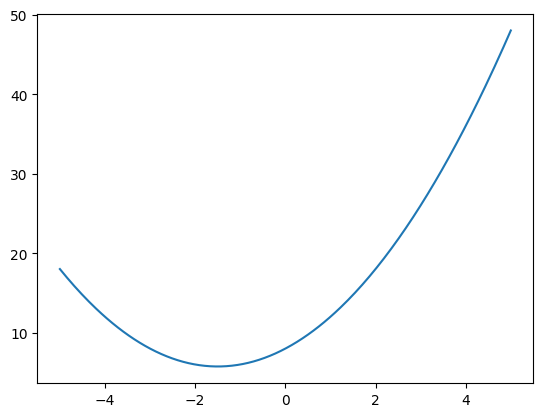

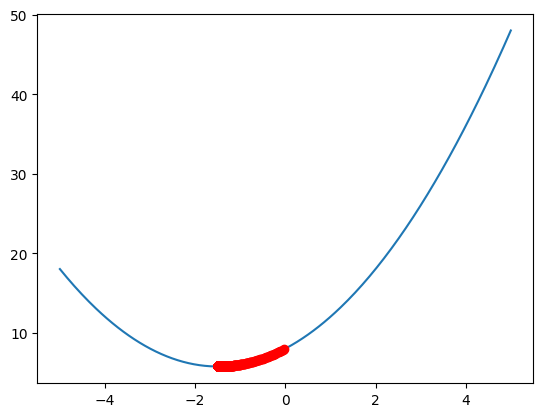

In [76]:
def f1(x):
    return x ** 2 + 3 * x + 8
def df1_dx(x):
    return 2*x + 3
xbase = np.linspace(-5, 5, 250)
plt.plot(xbase,f1(xbase))
start=np.array([-5],dtype=np.float64)
end=np.array([5],dtype=np.float64)
min,min_plt =gradient_descent(df1_dx,start,end)
print(min)
min_plt=np.array(min_plt)
print(min_plt)
#plt.plot(xbase,f1(xbase))

#plt.scatter(min_plt,f1(min_plt))
fig, ax = plt.subplots()
ax.plot(xbase,f1(xbase) )
highlight_point, = ax.plot([], [], 'ro')
def update(frame):
    # Clear the previous frame's highlight
    highlight_point.set_data([], [])
    
    # Animate the highlight for the current frame
    if frame % 2 == 0:  # Highlight for even frames, change this as needed
        highlight_point.set_data(min_plt,f1(min_plt) )
    
    return highlight_point,
ani = FuncAnimation(fig, update, frames=range(10), blit=True)
plt.show()

## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

[3.97764002 2.        ]


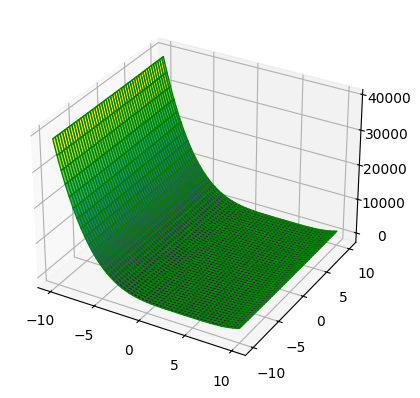

In [82]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4
def df3_dxy(x , y):
    return np.array([df3_dx(x, y),df3_dy(x, y)])
min,min_l=gradient_descent(df3_dxy,[-10,-10],[10,10],learn_rate=0.001, n_iter=250000, tolerance=1e-09)
ax = plt.figure().add_subplot(projection='3d')
X=np.linspace(-10, 10, 250)
Y=np.outer(np.linspace(-10, 10, 250), np.ones(250))
Z=f3(X,Y)
ax.plot_surface(X, Y, Z, cmap='viridis',edgecolor='green')
x = [point[0] for point in min_l]
y = [point[1] for point in min_l]
z = [f3(point[0], point[1]) for point in min_l]
ax.scatter(x, y, z, color='blue', s=30)
print (min)


## Problem 3 - 2-D function 

Derivatives and limits given. 

[-1.57075478 -1.57076389] -0.9999999993907933


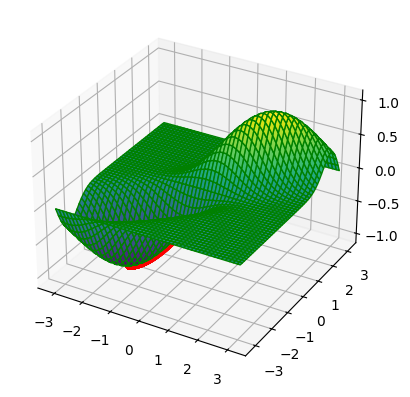

In [78]:
xlim4 = [-np.pi, np.pi]
def f4(x,y):
    return np.exp(-(x - y)**2) * np.sin(y)

def df4_dx(x, y):
    return -2 * np.exp(-(x - y)**2) * np.sin(y) * (x - y)

def df4_dy(x, y):
    return np.exp(-(x - y)**2) * np.cos(y) + 2 * np.exp(-(x - y)**2) * np.sin(y)*(x - y)
def df4_dxy(x , y):
    return np.array([df4_dx(x, y),df4_dy(x, y)])
min,min_l=gradient_descent(df4_dxy,[-3.14,-3.14],[3.14,3.14],6)
ax = plt.figure().add_subplot(projection='3d')
X=np.linspace(-3.14, 3.14, 250)
Y=np.outer(np.linspace(-3.14, 3.14, 250), np.ones(250))
Z=f4(X,Y) 
ax.plot_surface(X, Y, Z, cmap='viridis',\
                edgecolor='green')
x = [point[0] for point in min_l]
y = [point[1] for point in min_l]
z = [f4(point[0], point[1]) for point in min_l]
ax.scatter(x, y, z, color='red', s=30)
print(min,f4(*min))

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

[1.66166081]


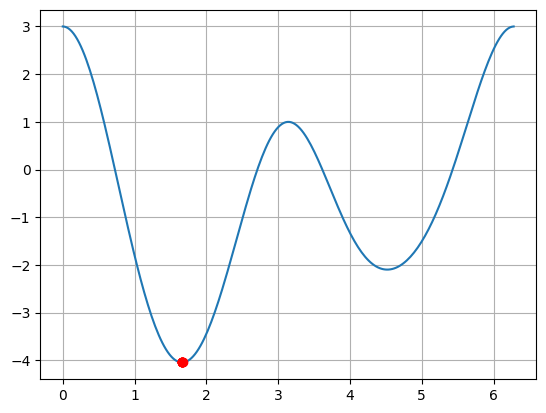

In [80]:
def f5(x):
    return np.cos(x)**4 - np.sin(x)**3 - 4*np.sin(x)**2 + np.cos(x) + 1
def diff_f5(x):
    df_dx = 4 * np.cos(x)**3 * (-np.sin(x)) - 3 * (np.sin(x)**2) * np.cos(x) - 8 * np.sin(x) * np.cos(x) - np.sin(x)
    return df_dx
min,min_plt=gradient_descent(diff_f5,[0],[2*np.pi],4,n_iter=2500,learn_rate=0.1)
xbase = np.linspace(0, 6.28, 250)
min_plt_y=f5(min_plt)
print(min)
#plt.plot(xbase,f5(xbase))
fig, ax = plt.subplots()
ax.plot(xbase,f5(xbase) )
highlight_point, = ax.plot([], [], 'ro')
def update(frame):
    # Clear the previous frame's highlight
    highlight_point.set_data([], [])
    
    # Animate the highlight for the current frame
    if frame % 2 == 0:  # Highlight for even frames, change this as needed
        highlight_point.set_data(min_plt,min_plt_y )
    
    return highlight_point,
ani = FuncAnimation(fig, update, frames=range(10), blit=True)
plt.grid(True)
plt.show()